#### Import neccessary libraries

In [89]:
import pandas as pd
from os import listdir
from os.path import isfile, join


#### Join our sales data into one big file to work with

In [90]:
all_data = pd.DataFrame()

path = "../Sales_Data/"
arr = listdir(path)
for file in arr:
    #print(path+file)
    df = pd.read_csv(f"{path}{file}")
    all_data = pd.concat([all_data,df], axis = 0)
    
all_data.to_csv("../Sales_Data/2019_Sales.csv", index=False)

all_data = pd.read_csv("../Sales_Data/2019_Sales.csv")

### What was the best month for sales and how much was earned?

In [91]:
# We will need to group by month and then add up total sales from quantity ordered * price each

all_data["Purchase Price"] = all_data["Quantity Ordered"] * all_data["Price Each"]

TypeError: can't multiply sequence by non-int of type 'str'

In [92]:
# Received an error when trying to do quantity ordered * price each for a new column 
# TypeError: can't multiply sequence by non-int of type 'str'

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934250 entries, 0 to 934249
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0.4      934250 non-null  int64  
 1   Unnamed: 0.3      747400 non-null  float64
 2   Unnamed: 0.2      560550 non-null  float64
 3   Unnamed: 0.1      373700 non-null  float64
 4   Unnamed: 0        186850 non-null  float64
 5   Order ID          931525 non-null  object 
 6   Product           931525 non-null  object 
 7   Quantity Ordered  931525 non-null  object 
 8   Price Each        931525 non-null  object 
 9   Order Date        931525 non-null  object 
 10  Purchase Address  931525 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 78.4+ MB


In [93]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"], errors="coerce")
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"], errors="coerce")

all_data["Purchase Price"] = all_data["Quantity Ordered"] * all_data["Price Each"]

all_data.head()

# Our purchase price column was add

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase Price
0,0,0.0,0.0,0.0,0.0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.0,2.0,2.0,2.0,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,3,3.0,3.0,3.0,3.0,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,4,4.0,4.0,4.0,4.0,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99


In [ ]:
# Need to extract the data from the order data column in order to group by the month
import datetime as dt

all_data["Month"] = all_data["Order Date"].dt.month
all_data["Year"] = all_data["Order Date"].dt.year

# Receiving an error when doing this since the order date is not in a date data type
# Can only use .dt accessor with datetimelike values

In [ ]:
# Try to convert Order Date to datetime but receive error invalid string coercion to datetime for "Order Date" at position 517

#all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

#all_data.head()

In [94]:
# Going to remove all NaNs since we have 900 rows with NaN

nan = all_data[all_data.isna().any(axis=1)]
nan.head()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase Price
1,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,356,356.0,356.0,356.0,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,519,519.0,519.0,519.0,519.0,Order ID,Product,NaN,NaN,Order Date,Purchase Address,NaN
735,735,735.0,735.0,735.0,735.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1149,1149,1149.0,1149.0,1149.0,1149.0,Order ID,Product,NaN,NaN,Order Date,Purchase Address,NaN


In [103]:
# This will set our data frame in place with no NaN values

all_data = all_data.dropna(axis=0, how='any', subset=None, inplace=False)
all_data.head()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase Price
0,0,0.0,0.0,0.0,0.0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,2,2.0,2.0,2.0,2.0,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,3,3.0,3.0,3.0,3.0,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,4,4.0,4.0,4.0,4.0,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,5,5.0,5.0,5.0,5.0,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [104]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors="coerce")

all_data.head()


,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase Price
0,0,0.0,0.0,0.0,0.0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,2,2.0,2.0,2.0,2.0,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,3,3.0,3.0,3.0,3.0,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,4,4.0,4.0,4.0,4.0,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,5,5.0,5.0,5.0,5.0,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [105]:
# Now that order date is a date time field we can use datetime from python to extract the month and year
# Values like this are usually represented as int so we can convert that we can use astype to convert

all_data["Month"] = all_data["Order Date"].dt.month
all_data["Year"] = all_data["Order Date"].dt.year

all_data.astype({"Month": "int32"}).dtypes
all_data.astype({"Year": "int32"}).dtypes

all_data.head()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase Price,Month,Year
0,0,0.0,0.0,0.0,0.0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,2019
2,2,2.0,2.0,2.0,2.0,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,2019
3,3,3.0,3.0,3.0,3.0,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,2019
4,4,4.0,4.0,4.0,4.0,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,2019
5,5,5.0,5.0,5.0,5.0,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,2019


In [110]:
# Drop the unnamed column from the index being added in our to_csv

string_match = "Unnamed"

columns_to_drop = [col for col in all_data.columns if string_match in col]

#columns_to_drop

all_data.drop(columns=columns_to_drop, inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase Price,Month,Year
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,2019
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,2019
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,2019
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,2019
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,2019


In [125]:
# Now that we cleaned up our data frame and added the columns neccessary to answer the question: 
### What was the best month for sales and how much was earned?

# Sales by month

# We group by month and select the purchase price column then sum 
# Reset index makes Month act like a normal column and not an index
results = all_data.groupby(["Month"])["Purchase Price"].sum().reset_index()

# This sorts by the largest purchase price down
#results = results.sort_values("Purchase Price", ascending=False)

# Return results without pandas dataframe
print(results.to_string(index=False))




 Month  Purchase Price
     1      1822256.73
     2      2202022.42
     3      2807100.38
     4      3390670.24
     5      3152606.75
     6      2577802.26
     7      2647775.76
     8      2244467.88
     9      2097560.13
    10      3736726.88
    11      3199603.20
    12      4613443.34


In [129]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           12 non-null     int64  
 1   Purchase Price  12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 324.0 bytes


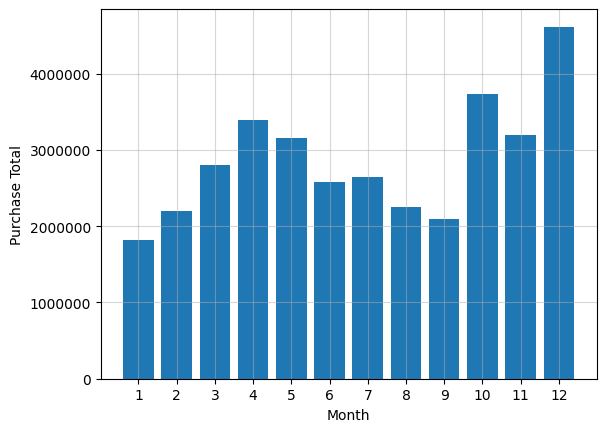

In [139]:
import matplotlib.pyplot as plt

months = results["Month"]
purchase_price = results["Purchase Price"]

plt.bar(months, purchase_price)
plt.xlabel("Month")
plt.ylabel("Purchase Total")

plt.xticks(months)
plt.ticklabel_format(axis='y', style='plain')

plt.grid(True, alpha=0.5)

plt.show();
